风险测度

10.4.1 风险价值

In [29]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as scs

使用 lack -Scholes-Merton 设置

In [30]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10008
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I)) 

In [31]:
R_gbm = np.sort(ST - S0)

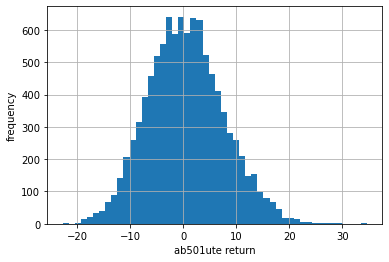

In [32]:
plt.hist(R_gbm, bins=50)
plt.xlabel('ab501ute return')
plt.ylabel('frequency')
plt.grid(True)

In [33]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.530
           99.90           18.856
           99.00           15.257
           97.50           12.666
           95.00           10.789
           90.00            8.460


Merton 的跳跃扩散 动态模拟:

In [36]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0


M = 50
I = 10000
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0

sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt+ sigma * np.sqrt(dt) * sn1[t])+ (np.exp(mu + delta * sn2[t]) - 1)* poi[t])
    S[t] = np.maximum(S[t], 0)

In [37]:
R_jd = np.sort(S[-1] - S0)

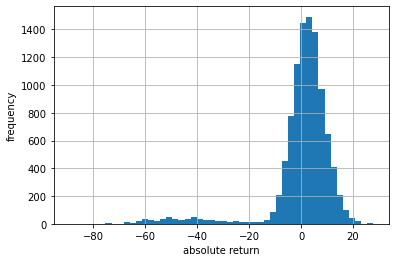

In [39]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [40]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           81.562
           99.90           73.438
           99.00           58.324
           97.50           47.381
           95.00           27.531
           90.00            6.692


(-93.56392931025302, 0.0)

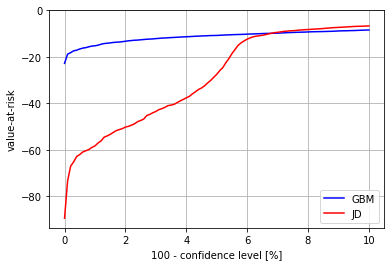

In [43]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)

信用价值调整
